# (Presentation Title)
## by Veris Pflueger-Prasarntree

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> This dataset contains data regarding loans made by Propser, a peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than 18 billion in loans to more than 1,080,000 people. TBorrowers apply online for a fixed-rate, fixed-term loan between 2,000 and 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('engineered_loans_data.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

* The distribution for Prosper Scores, scored from 1 to 10 (1 being most risky, 10 being lowest risk) seems to have normal distribution roughly divided in half.

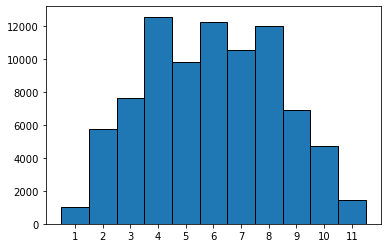

In [15]:
bins = np.arange(1, 13) - 0.5
plt.hist(data=loans, bins=bins, x='ProsperScore', ec='black')
plt.xticks(np.arange(1, 12));

We can see as the Prosper Score goes up, the Actual Loss drops noticeably for those with a Prosper Score of 7 and higher. Of course, in taking into account the actual distribution of Prosper Scores, this likely reflects the fact that most borrowers fall into the range of 4 to 8 and thus this is where we will find most individuals. Still it is recognizable that there is a difference between those with a Prosper Score of 4 to 6 and those with 7 or 8.

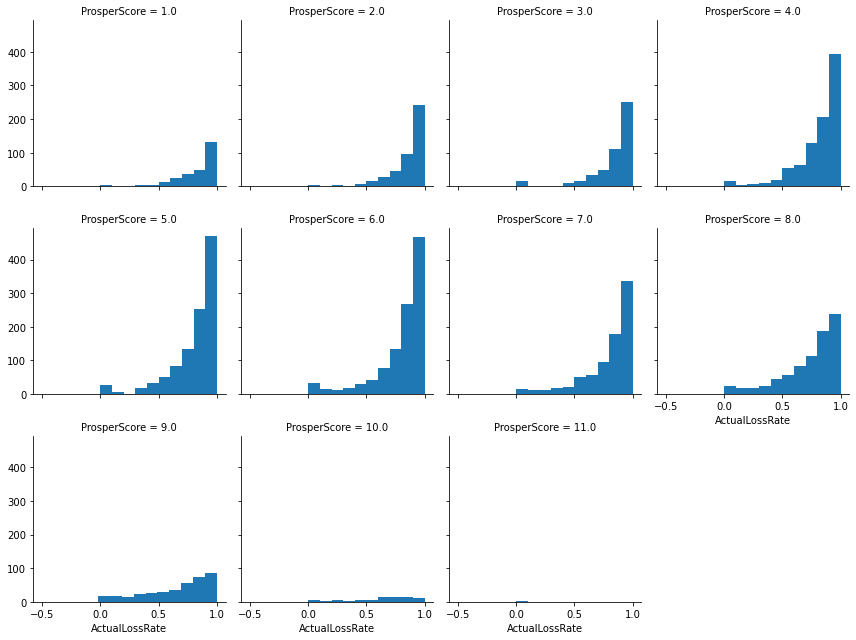

In [11]:
g = sns.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "ActualLossRate");

* Estimated Loss in the Prosper Score range of 5 to 8 appears similar, though Prosper Score of 4 overall has potential higher estimated loss and higher amounts of average estimated loss. There is a spike in Prosper Score of 8.

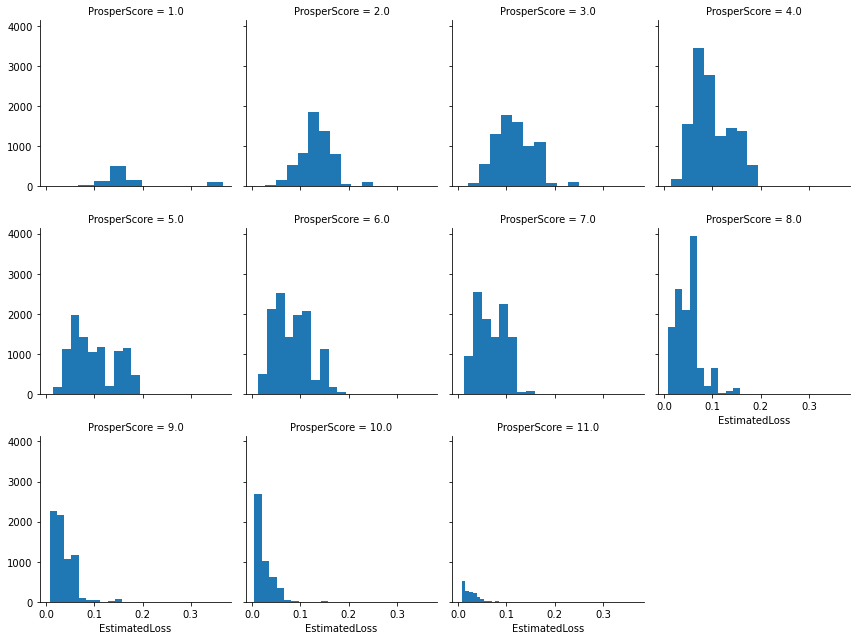

In [13]:
g = sns.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "EstimatedLoss");

* The Debt to Income Ratio among the majority of the Prosper Score categories is similarly distributed. Suggesting it does not hold a significant relation to Prosper Score.

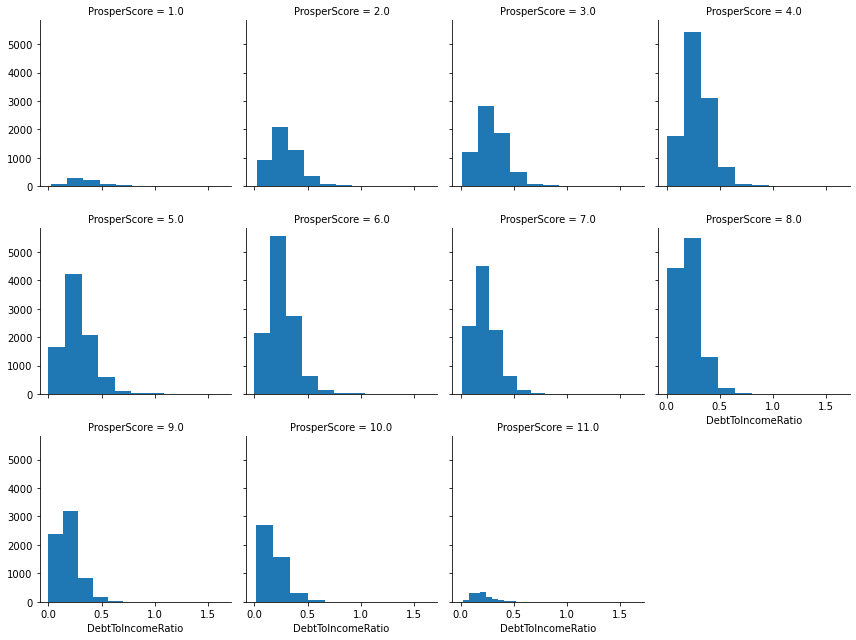

In [12]:
g = sns.FacetGrid(data = loans.query('DebtToIncomeRatio < 1.67'), col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "DebtToIncomeRatio");

## (Visualization 2)

* When looking at the PropserScore across each Loan type, the distribution appears normal and it does not seem like any one or range of ProsperScores is more represented in Past Due or Defaulted loans.

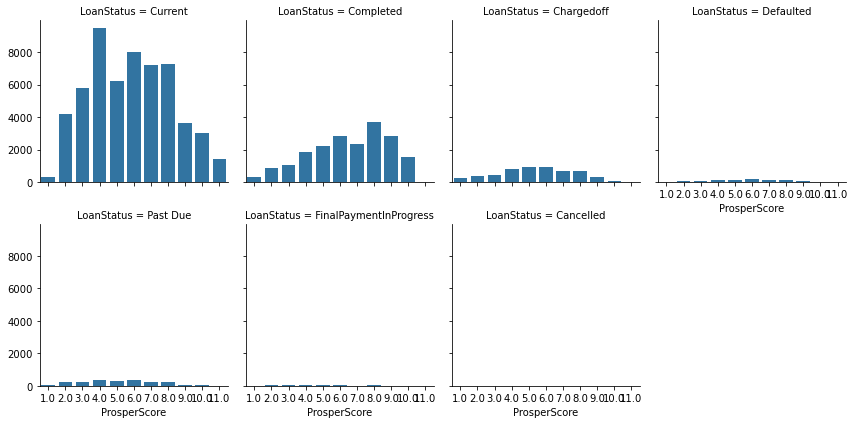

In [5]:
statuses = list(loans.LoanStatus.value_counts().index)
loan_statuses = pd.api.types.CategoricalDtype(ordered=False, categories=statuses)
loans['LoanStatus'] = loans['LoanStatus'].astype(loan_statuses)
score_order = list(loans.ProsperScore.value_counts().sort_index().index)

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = loans, col = 'LoanStatus', col_wrap=4, margin_titles = True)
g.map(sns.countplot, "ProsperScore", order=score_order);

## (Visualization 3)

Here rather than see the estimated loss, we can look at the Actual Loss Rate and compare it to the Debt to Income Ratio for each level of Prosper Score, a custom risk score. One aspect that can be immediately observed is that the correlation between the Debt to Income Ratio and the Actual Loss Rate goes from neutral with lower Propser Scores and turns negative with the high end of Prosper Scores, from 8 onward. This suggests the Prosper Score has viability in determining whether the loan may be paid back.

For Prosper Scores 8 to 10, even as the Debt to Income Ratio increased, the Actual Loss Rate did not increase. Unlike the Prosper Scores 1 to 3, where even with low Debt to Income Ratios, the Actual Loss Rates are generally still high. Though the correlation is neutral, we can see the concentration of data points is focused in high Actual Loss Rates even for low Debt to Income Ratios. As the Prosper Score increases, we see more data points in the low end of Actual Loss Rates, even as the correlation stays neutral.

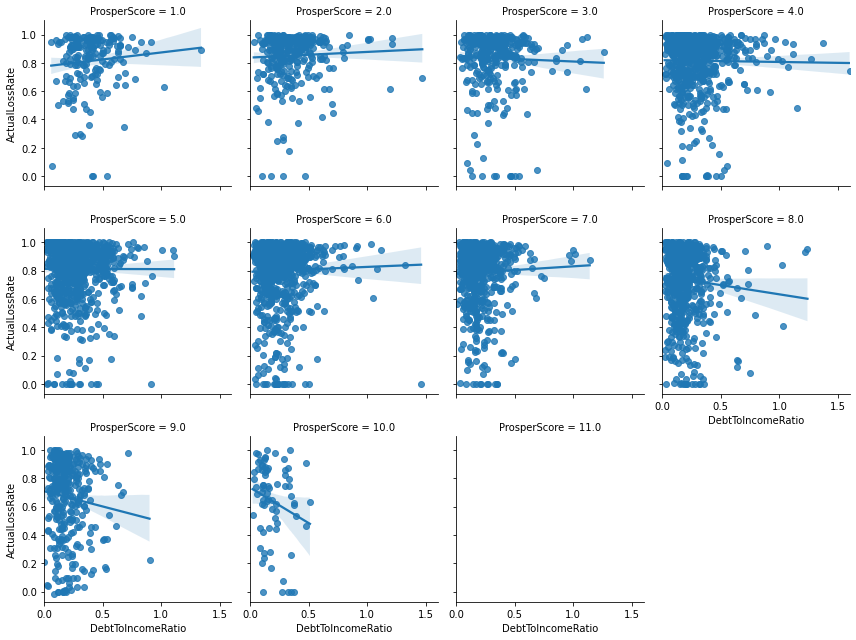

In [6]:
g = sns.FacetGrid(data = loans.query('DebtToIncomeRatio < 1.67'), col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'DebtToIncomeRatio', 'ActualLossRate');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!